In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

from frt_distributions import AnalyticalDistribution, DistributionDistance, calc_distance, generate_embedding, mean_variance_embedding, detect_communities

In [4]:
import time

In [42]:
G = nx.watts_strogatz_graph(10, 4, 0.2)
A = nx.to_scipy_sparse_array(G, nodelist=range(G.number_of_nodes()))
d1 = AnalyticalDistribution(G)
 
t1 = -time.time()
d1.compute_FRT_distributions(max_steps=49, progress_bar=False)
t1 += time.time()
 
t2 = -time.time()
from convert_ad import first_return_dist
first_return_dist(A, K=50)
t2 += time.time()

print(t1, t2)

0.019604921340942383 0.0011391639709472656


In [44]:
FRTs = generate_embedding(G, M=9)

Computing FRT Distributions: 100%|████████████| 10/10 [00:00<00:00, 6246.17it/s]


In [46]:
FRTs2 = first_return_dist(A, K=10)

In [48]:
FRTs2.shape

(10, 10)

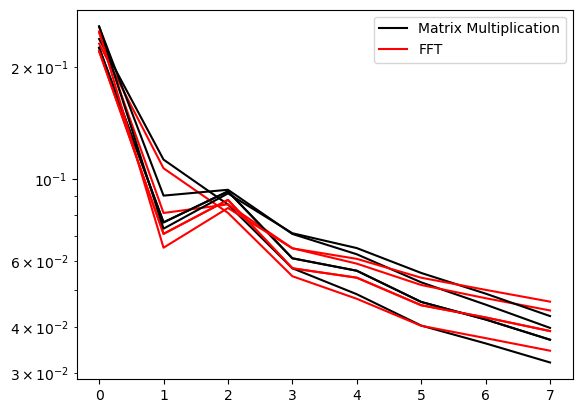

In [60]:
plt.plot(FRTs[0], color='k', label='Matrix Multiplication')
plt.plot(FRTs2[0, 2:], color='r', label='FFT')
for i in range(1, 5):
    plt.plot(FRTs[i], color='k')
    plt.plot(FRTs2[i, 2:], color='r')

plt.yscale('log')
plt.legend()

In [52]:
G = nx.watts_strogatz_graph(500, 4, 0.2)
A = nx.to_scipy_sparse_array(G, nodelist=range(G.number_of_nodes()))
d1 = AnalyticalDistribution(G)

steps = np.arange(20, 1020, 20)

In [64]:
times = np.zeros((len(steps), 2))
for i in range(len(steps)):
    print(steps[i])
    G = nx.watts_strogatz_graph(steps[i], 4, 0.2)
    A = nx.to_scipy_sparse_array(G, nodelist=range(G.number_of_nodes()))
    d1 = AnalyticalDistribution(G)
    t1 = -time.time()
    d1.compute_FRT_distributions(max_steps=299, progress_bar=False)
    t1 += time.time()
     
    t2 = -time.time()
    first_return_dist(A, K=300)
    t2 += time.time()

    times[i] = t1, t2

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000


Text(0, 0.5, 'Time')

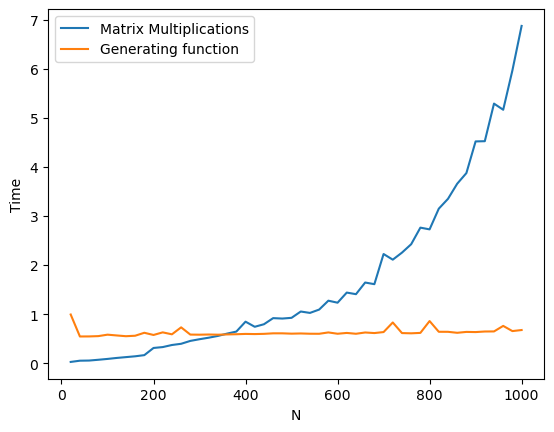

In [62]:
plt.plot(steps, times[:, 0], label='Matrix Multiplications')
plt.plot(steps, times[:, 1], label='Generating function')
plt.legend()
#plt.yscale('log') ; plt.xscale('log')
plt.xlabel('N') ; plt.ylabel('Time')
#plt.xlim(0, 20) ; plt.ylim(0, 1)

Text(0, 0.5, 'Time')

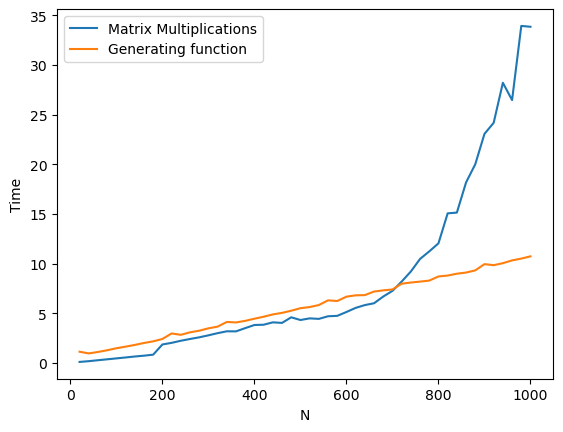

In [72]:
plt.plot(steps, times[:, 0], label='Matrix Multiplications')
plt.plot(steps, times[:, 1], label='Generating function')
plt.legend()
#plt.yscale('log') ; plt.xscale('log')
plt.xlabel('N') ; plt.ylabel('Time')
#plt.xlim(0, 20) ; plt.ylim(0, 1)

In [106]:
steps[26]

270